<a href="https://colab.research.google.com/github/ravulaarundhathi/PRODIGY_DS_4/blob/main/Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string


In [4]:
df = pd.read_csv('/content/twitter_training.csv.zip', header=None)
df.head()


,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [5]:
df.columns = ['Tweet_ID', 'Entity', 'Sentiment', 'Tweet_Text']
df.head()


,Tweet_ID,Entity,Sentiment,Tweet_Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Tweet_ID    74682 non-null  int64 
 1   Entity      74682 non-null  object
 2   Sentiment   74682 non-null  object
 3   Tweet_Text  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [7]:
df['Sentiment'].value_counts()


,count
Sentiment,
Negative,22542
Positive,20832
Neutral,18318
Irrelevant,12990


In [8]:
df.isnull().sum()


,0
Tweet_ID,0
Entity,0
Sentiment,0
Tweet_Text,686


In [9]:
df.dropna(inplace=True)


In [11]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#", "", text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r"\d+", "", text)
    return text


In [12]:
df['Clean_Tweet'] = df['Tweet_Text'].apply(clean_text)
df.head()


,Tweet_ID,Entity,Sentiment,Tweet_Text,Clean_Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands and i will murder y...


In [13]:
sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts


,count
Sentiment,
Negative,22358
Positive,20655
Neutral,18108
Irrelevant,12875


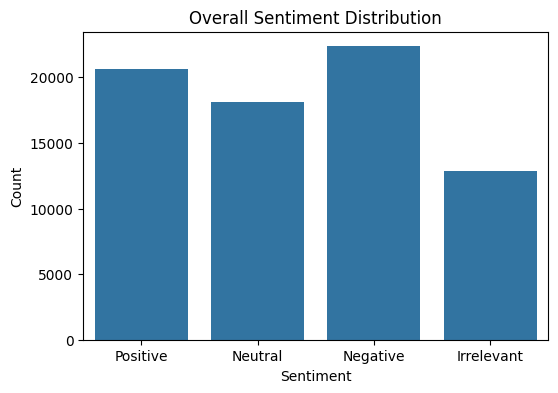

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(x='Sentiment', data=df)
plt.title("Overall Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


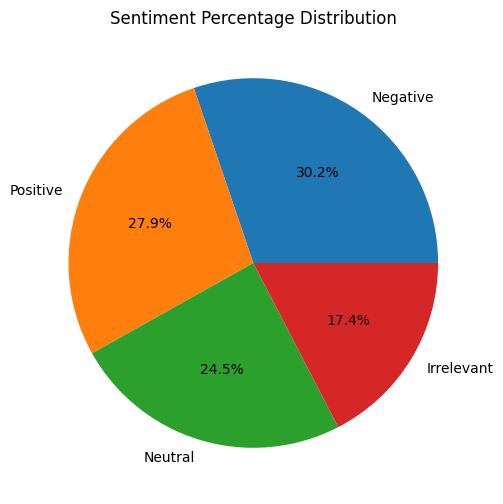

In [15]:
plt.figure(figsize=(6,6))
df['Sentiment'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Sentiment Percentage Distribution")
plt.ylabel("")
plt.show()


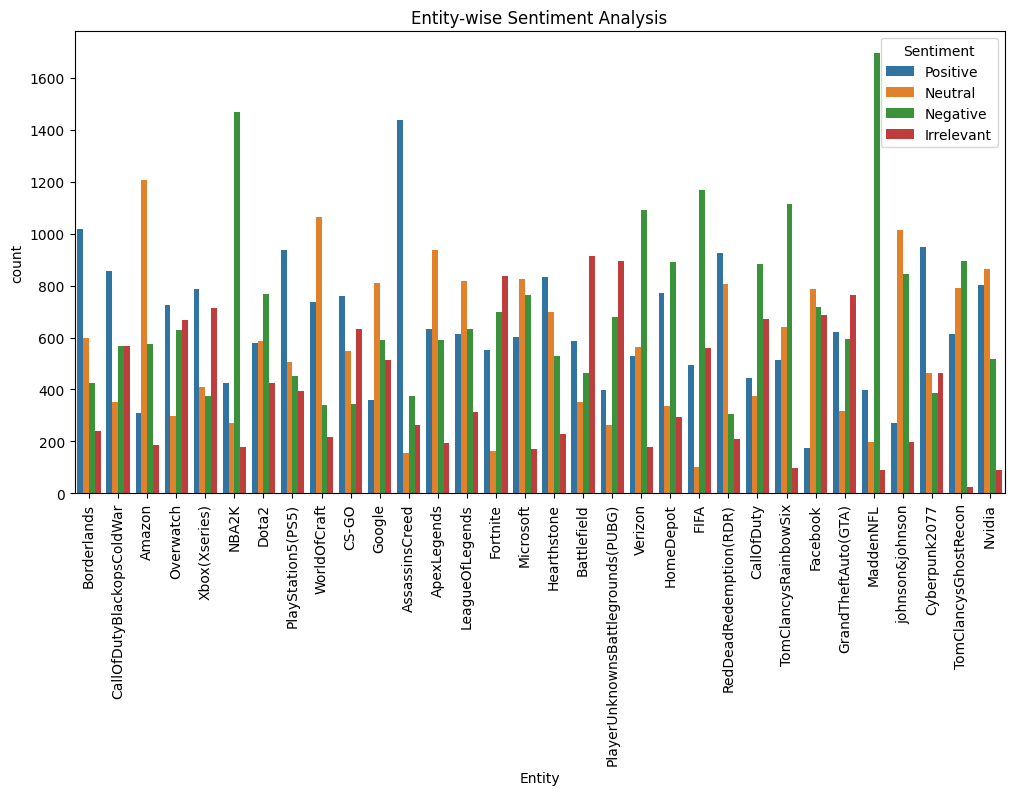

In [16]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Entity', hue='Sentiment')
plt.xticks(rotation=90)
plt.title("Entity-wise Sentiment Analysis")
plt.show()


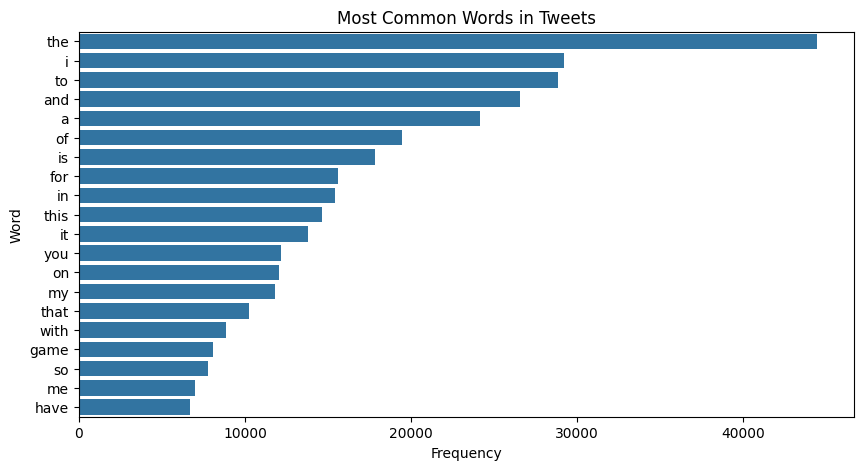

In [20]:
from collections import Counter
all_words = ' '.join(df['Clean_Tweet'])
word_freq = Counter(all_words.split()).most_common(20)
words_df = pd.DataFrame(word_freq, columns=['Word', 'Frequency'])
plt.figure(figsize=(10,5))
sns.barplot(x='Frequency', y='Word', data=words_df)
plt.title("Most Common Words in Tweets")
plt.show()

